<a href="https://colab.research.google.com/github/raghavajoijode/term3/blob/master/ClassificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" />
</center>

# Classification Models

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Data Loading and Description](#section3)<br>
   - 3.1 [Description of the dataset](#section301)<br>
   - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Exploration](#section4)<br>
   - 4.1 [Data Preprocessing](#section401)<br>
     - 4.1.1 [Converting Columns to Numeric Datatype](#section40101)<br>
     - 4.1.2 [Dealing with Missing Values.](#section40103)<br>
   - 4.2 [Exploratory Data Analysis](#section402)<br>
     - 4.2.1 [Removing Outliers](#section40201)<br>
     - 4.2.2 [Pandas Profiling after Data Preprocessing](#section40202)<br>
5. [Data train/test split](#section6)<br>
6. [Modelling using scikit learn](#section7)<br>
   - 6.1 [Linear Regression in Scikit-Learn](#section701)<br>
   - 6.2 [Decision tree Regressor in Scikit-Learn](#section702)<br>
   - 6.3 [Random Forest Regressor in Scikit-Learn](#section703)<br>

7. [Conclusion](#section9)<br>

<a id=section1></a>
## 1. Problem Statement

A little background on the case study. This data belongs to a **loan aggregator agency** which connects loan applications to different financial institutions in an attempt to get the **best interest rate**. 

They want to now utilise the past data to **predict interest rate** given by any financial institute just by looking at loan application characteristics.
<center>
<img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/interest%20rate.jpg" width="300" height="300" />
</center>

Some companies which perform something similar in the industry:
- __BankBazaar__
- __Credit Nation__
- __Rupeelend.com__

To achieve that, we have decided to use the data from a particular financial institution. The data is given in the file **loans data.csv**.

<a id=section2></a>
## 2. Importing Packages

In [ ]:
import numpy as np
np.set_printoptions(precision=4)      # To display values upto Four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.

import pandas_profiling

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')    # To apply seaborn whitegrid style to the plots.
plt.rc('figure', figsize=(10, 8))     # Set the default figure size of plots.
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")     # To suppress all the warnings in the notebook.

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id=section3></a>
## 3. Data Loading and Description

In [ ]:
# Importing the dataset

ld = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loans%20data.csv')

In [ ]:
ld.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [ ]:
ld.shape

(2500, 15)

<a id=section301></a>
### 3.1 Description of the Dataset

- The dataset contains all the necessary information about the previous loan applicant like the **amount requested, loan length, loan purpose, state, monthly income** etc.


- Also included in the dataset is the **Interest rate** provided by the bank to the applicants when they applied for the loan. This is the data that we have to predict for the future applicants. <br> 

| Column Name                     | Description                                                                               |
| ------------------------------- |:-----------------------------------------------------------------------------------------:| 
| ID                              | ID of the applicant.                                                                      | 
| Amount.Requested                | The amount (in dollars) requested in the loan application.                                |
| Amount.Funded.By.Investors      | The amount (in dollars) loaned to the individual.                                         | 
| Interest.Rate                   | The lending interest rate.                                                                |
| Loan.Length                     | The length of time (in months) of the loan.                                               |
| Loan.Purpose                    | The purpose of the loan as stated by the applicant.                                       |
| Debt.to.Income.Ratio            | The percentage of consumer’s gross income that goes toward paying debts.                  |
| State                           | The abbreviation for the U.S. state of residence of the loan applicant.                   |
| Home.Ownsership                 | A variable indicating whether the applicant owns, rents, or has a mortgage on their home. |
| Monthly.Income                  | The monthly income of the applicant (in dollars).                                         |
| FICO.Range                      | A range indicating the applicants FICO score. This is a measure of the creditworthiness of the applicant.                                                                                                                |
| Open.CREDIT.Lines               | The number of open lines of credit the applicant had at the time of application.          |
| Revolving.CREDIT.Balance        | The total amount outstanding all lines of credit.                                         |
| Inquiries.in.the.Last.6.Months  | When a person applies for credit, they authorize the lender to “inquire” about their creditworthiness. This is the number of such authorized queries in the 6 months before the loan was issued.                   |
| Employment.Length               | Length of time employed at current job.                                                   |

In [ ]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2499 non-null   object 
 2   Amount.Funded.By.Investors      2499 non-null   object 
 3   Interest.Rate                   2500 non-null   object 
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2497 non-null   float64
 10  FICO.Range                      2500 non-null   object 
 11  Open.CREDIT.Lines               2496 non-null   object 
 12  Revolving.CREDIT.Balance        24

- ```info``` function gives us the following insights into the data:

  - There are a total of **2500 samples (rows)** and **15 columns** in the dataset.
  
  - There are **3 columns** with a **numeric** datatype and **12 columns** with an **object** datatype.

In [ ]:
ld.describe()

,ID,Monthly.Income,Inquiries.in.the.Last.6.Months
count,2499.000000,2497.000000,2497.000000
mean,51643.325330,5689.716608,0.906688
std,30053.637661,3963.568002,1.231149
min,10.000000,588.500000,0.000000
25%,26570.500000,3500.000000,0.000000
50%,50673.000000,5000.000000,0.000000
75%,77583.000000,6800.000000,1.000000
max,104202.000000,102750.000000,9.000000


- ```describe``` function gives us the following insights into the data:
  - The distribution of **Monthly.Income** is **positive (right) skewed** because the **mean** of **Monthly.Income (5689.7)** lies to the **right** of the **median(50%)** value **(5000)**, on a **distribution plot**. 
  
  - Majority of the values of **Monthly.Income** lie at monthly income **less than 10000** as shown by our **75%** value.
  
  - The **maximum** value of **Monthly.Income** is **102750**, which is clearly an **outlier** because its value is very distant from the **75%** value. 
  
  - Majority of the values of **Inquiries.in.the.Last.6.Months** lie between the range of **0 to 1**.

---

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

<center>
<img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/Pandas%20profiling.png" height="400" width="500"/>
</center>

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __ld_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [ ]:
# If pandas profiling gives an error, please update pandas-profiling by running this command in the comments below.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [ ]:
import pandas_profiling

In [ ]:
# Performing pandas profiling before data preparation.
# Saving the output as ld_before_preprocessing.html

# To output pandas profiling report to an external html file.

profile = ld.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="ld_before_preprocessing.html")

# To output the pandas profiling report on the notebook.

#ld.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 15
- Number of observations: 2500
- Missing cells: 99 (< 0.1%)


__Variables types__: 
- Numeric = 3 
- Categorical = 12

<br>

- **Employment.Length** has **78 (3.1%) missing** values.


- **Home.Ownership** has **99.7%** samples belonging to **3** categories:
 
  - MORTGAGE: 1147 samples (45.9% share)	 
 
  - RENT: 1146 samples (45.8% share)	 
  
  - OWN: 200 samples (8.0% share)


- **Inquiries.in.the.Last.6.Months** has data divided into **10** distinct values.

  - The distribution is positive (right) skewed with **skewness** value **2.0421**.
  
  - **95%** values lie in the range between **0 to 3**.
  
  - __0__ is the most common value with a frequency of **50%**.


- **Loan.Length** has **99.9%** samples belonging to **2** categories:
 
  - 36 months: 1950 samples (78.0% share)	 
 
  - 60 months: 548 samples (21.9% share)	
  
    
- **Loan.Purpose** has data divided into **14** distinct categories.

  - The category **debt_consolidation** has the highest share with **1307** samples **(52.3% share)**.
  
  - Then categories **credit_card**	has **444** samples **(17.8% share)**, **other** has **200** samples **(8.0% share)**, **home_improvement** has **152** samples **(6.1% share)**.


- **Monthly.Income** has a **skewness** of **8.4714** and **kurtosis** of **167.49**.

  - The distribution is positive (right) skewed.
  
  - The high value of **kurtosis** implies that the tail is very long and there is a presence of outliers in the data.
  
  - **95%** samples have a **Monthly.Income** less than **11667**.
  
  - **Interquartile range (IQR)** is **3300** and **mean** is **5689.7**, so extreme outliers will be after ```mean + (3 * IQR)``` ie. **15589.7**
  

- **State** has very **high cardinality** as there are **47 distinct** values in the dataset.

---

<a id=section4></a>
## 4. Data Exploration

<a id=section401></a>
### 4.1 Data Preprocessing

Since most of the columns in the dataset have **missing values** and contain data with textual values in them, they can't be used for **Statistical Analysis** and **Data Visualization** without performing **Data Preprocessing** on them. <br>

<a id=section40101></a>
#### 4.1.1 Converting Columns to Numeric Datatype

In [ ]:
# ID column has a distinct value for each sample, and it won't help our model in any way.
# Dropping ID column from the dataset.

ld.drop(['ID'], 1, inplace=True)

In [ ]:
ld.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


- You can see that variable **Interest.Rate** and **Debt.To.Income.Ratio** contain **%** sign in their values and as a result they have an __object__ datatype in the dataset. Lets __remove__ these __%__ signs first.

In [ ]:
# Using str class methods to perform data cleaning.
# Removing the % sign from the Interest.Rate column and converting to float datatype.

ld['Interest.Rate'] = ld['Interest.Rate'].str.replace('%', '').astype(float)

In [ ]:
# Removing the % sign from the Debt.To.Income.Ratio column and converting to float datatype.

ld['Debt.To.Income.Ratio'] = ld['Debt.To.Income.Ratio'].str.replace('%', '').astype(float)

In [ ]:
ld.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000,20000,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,19200,19200,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,35000,35000,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,10000,9975,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,12000,12000,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [ ]:
ld.dtypes

Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

- Here we can see that the columns which should have had a **numeric** datatype, have an **object** datatype, because of the presence of character values in those columns of the dataset. 
  - We'll convert all such columns to have a **numeric** datatype.

In [ ]:
for col in ['Amount.Requested','Amount.Funded.By.Investors','Open.CREDIT.Lines','Revolving.CREDIT.Balance',
           'Inquiries.in.the.Last.6.Months','Interest.Rate']:
           ld[col] = pd.to_numeric(ld[col], errors = 'coerce')

In [ ]:
ld.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

<a id=section40103></a>
#### 4.1.2 Dealing with Missing Values. <br>

In [ ]:
# Checking for missing values in each column.

ld.isnull().sum()

Amount.Requested                   5
Amount.Funded.By.Investors         5
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  9
Revolving.CREDIT.Balance           5
Inquiries.in.the.Last.6.Months     3
Employment.Length                 78
dtype: int64

**What to do with Missing values** 

  While dealing with missing values we have two options, either we:


  1. __Drop the missing values__

  2. __Impute the missing values__



Dropping the **missing values** 

In [ ]:
ld.dropna(inplace=True)
ld.reset_index(drop=True,inplace=True)

In [ ]:
ld.isnull().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

In [ ]:
# Checking Employment.Length column

ld['Employment.Length'].value_counts(dropna=False)

10+ years    648
< 1 year     245
2 years      241
3 years      234
5 years      198
4 years      189
1 year       176
6 years      160
7 years      124
8 years      107
9 years       71
.              2
Name: Employment.Length, dtype: int64

In [ ]:
# Removing 'year' and 'years' from Employment.Length.

ld['Employment.Length'] = ld['Employment.Length'].astype('str')
ld['Employment.Length'] = ld['Employment.Length'].str.replace(' years', '').str.replace(' year', '')
ld['Employment.Length'] = ld['Employment.Length'].str.replace('< 1', '0').str.replace('.', '1').str.replace('+', '')

In [ ]:
ld['Employment.Length'] = pd.to_numeric(ld['Employment.Length'], errors='coerce')

In [ ]:
ld['Employment.Length'].value_counts()

10    648
0     245
2     241
3     234
5     198
4     189
1     178
6     160
7     124
8     107
9      71
Name: Employment.Length, dtype: int64

In [ ]:
round(ld.groupby('Employment.Length')['Interest.Rate'].mean(), 2)

Employment.Length
0     12.92
1     12.50
2     12.86
3     12.79
4     13.13
5     13.43
6     13.23
7     13.09
8     12.97
9     13.25
10    13.35
Name: Interest.Rate, dtype: float64

In [ ]:
# Calculating the number of unique values in the State column.

ld['State'].nunique()

46

__Cardinality__: Cardinality refers to the uniqueness of data values contained in a column. High cardinality means that the column contains a large percentage of totally unique values. Low cardinality means that the column contains a lot of “repeats” in its data range: 

  - **High Cardinality** in state column (too many unique values).

  - Although, its not a legit reason to drop a variable. But, we'll ignore this in this discussion anyway in order to reduce amount of data preparation that we are doing here. 

You can try including it in your model and see if the performance improves.

In [ ]:
# Dropping State column.

ld.drop(['State'], 1, inplace=True)

In [ ]:
# Also dropping Amount.Funded.By.Investors column because it has a very strong correlation with Amount.Requested column.
# If we keep both these columns, it will lead to multicollinearity in our dataset.

ld.drop(['Amount.Funded.By.Investors'], 1, inplace=True)

In [ ]:
ld.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                   int64
dtype: object

- Next we will preprocess **Loan.Length** column to have **numerical** values instead of **string** values.

In [ ]:
# Checking the different unique values in the Loan.Length column.

ld['Loan.Length'].value_counts()

36 months    1859
60 months     535
.               1
Name: Loan.Length, dtype: int64

In [ ]:
ld[ld['Loan.Length'] == '.']

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
57,13500.0,14.33,.,debt_consolidation,31.7,RENT,4166.67,680-684,11.0,31168.0,0.0,1


In [ ]:
# Replacing the '.' value from the Loan.Length column with the mode value of '36 months'.
 
ld.iloc[57,2] = '36 months'

In [ ]:
ld['Loan.Length'].value_counts()

36 months    1860
60 months     535
Name: Loan.Length, dtype: int64

In [ ]:
# Removing the 'months' word from the Loan.Length column and converting to float datatype.

ld['Loan.Length'] = ld['Loan.Length'].str.replace(' months', '').astype(int)

In [ ]:
ld.head()

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,8.90,36,debt_consolidation,14.90,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,0
1,19200.0,12.12,36,debt_consolidation,28.36,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2
2,35000.0,21.98,60,debt_consolidation,23.81,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2
3,10000.0,9.99,36,debt_consolidation,14.30,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5
4,12000.0,11.71,36,credit_card,18.78,RENT,3195.00,695-699,11.0,14469.0,0.0,9


In [ ]:
ld.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                         int64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                   int64
dtype: object

- Next we examine variable **Loan.Purpose**.

In [ ]:
ld['Loan.Purpose'].value_counts()

debt_consolidation    1263
credit_card            426
other                  182
home_improvement       143
major_purchase          98
small_business          82
car                     49
wedding                 38
medical                 28
moving                  28
vacation                20
house                   20
educational             14
renewable_energy         4
Name: Loan.Purpose, dtype: int64

- There are **14 categories** in that variable, we can either make 13 dummies or we can club these categories together and reduce the number of effective categories and then make dummy variables for those.


- It makes sense to **club those categories** which behave similarly in terms of their effect on response or in other words, we can **club those categories** for which **average interest rates** are **similar** in the data.

In [ ]:
round(ld.groupby('Loan.Purpose')['Interest.Rate'].mean())

Loan.Purpose
car                   11.0
credit_card           13.0
debt_consolidation    14.0
educational           11.0
home_improvement      12.0
house                 13.0
major_purchase        11.0
medical               12.0
moving                14.0
other                 13.0
renewable_energy      10.0
small_business        13.0
vacation              12.0
wedding               12.0
Name: Interest.Rate, dtype: float64

In [ ]:
# Creating a dictionary to encode all the different values in Loan.Purpose column to numerical values.

lp_encoding = {'renewable_energy':0,
               'car':1, 'educational':1, 'major_purchase':1, 
               'home_improvement':2, 'medical':2, 'vacation':2, 'wedding':2,
               'credit_card':3, 'house':3, 'other':3, 'small_business':3,
               'debt_consolidation':4, 'moving':4}

In [ ]:
# Using the map function to apply the numerical values to the Loan.Purpose column.

ld['Loan.Purpose'] = ld['Loan.Purpose'].map(lp_encoding)
ld.head()

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,8.90,36,4,14.90,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,0
1,19200.0,12.12,36,4,28.36,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2
2,35000.0,21.98,60,4,23.81,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2
3,10000.0,9.99,36,4,14.30,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5
4,12000.0,11.71,36,3,18.78,RENT,3195.00,695-699,11.0,14469.0,0.0,9


In [ ]:
# Using pandas get_dummies function to create dummy variables for the 5 different categories of Loan.Purpose column.
# Using drop_first=True will automatically drop the first column of the dummy variables dataframe. (We'll get only 4 columns)
# We drop one column from the dummy variables in order to avoid multicollinearity.

lp_dummies = pd.get_dummies(ld['Loan.Purpose'], prefix = 'LP', drop_first=True)

In [ ]:
lp_dummies.head()

,LP_1,LP_2,LP_3,LP_4
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0


- We'll add this **dummy variable dataframe** to the original dataset. And then drop the original variable **Loan.Purpose**. <br>

In [ ]:
# Concatenating the dummy variables into the dataset.

ld = pd.concat([ld,lp_dummies], 1)

# Dropping the Loan.Purpose column.

ld.drop(['Loan.Purpose'], 1, inplace=True)

In [ ]:
ld.head()

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LP_1,LP_2,LP_3,LP_4
0,20000.0,8.90,36,14.90,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,0,0,0,0,1
1,19200.0,12.12,36,28.36,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2,0,0,0,1
2,35000.0,21.98,60,23.81,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2,0,0,0,1
3,10000.0,9.99,36,14.30,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5,0,0,0,1
4,12000.0,11.71,36,18.78,RENT,3195.00,695-699,11.0,14469.0,0.0,9,0,0,1,0


- We can see from the table above that there are **5 different categories** in the data. Lets club them.

- Next we take care of variable **Home.Ownership**.

In [ ]:
ld['Home.Ownership'].value_counts()

RENT        1105
MORTGAGE    1098
OWN          187
OTHER          5
Name: Home.Ownership, dtype: int64

In [ ]:
# Creating two new columns representing the values MORTGAGE and RENT from the Home.Ownership column.

ld['ho_mort'] = np.where(ld['Home.Ownership'] == 'MORTGAGE', 1, 0)
ld['ho_rent'] = np.where(ld['Home.Ownership'] == 'RENT', 1, 0)

# Dropping the Home.Ownership column.

ld.drop(['Home.Ownership'], 1, inplace=True)

In [ ]:
ld.head()

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LP_1,LP_2,LP_3,LP_4,ho_mort,ho_rent
0,20000.0,8.90,36,14.90,6541.67,735-739,14.0,14272.0,2.0,0,0,0,0,1,1,0
1,19200.0,12.12,36,28.36,4583.33,715-719,12.0,11140.0,1.0,2,0,0,0,1,1,0
2,35000.0,21.98,60,23.81,11500.00,690-694,14.0,21977.0,1.0,2,0,0,0,1,1,0
3,10000.0,9.99,36,14.30,3833.33,695-699,10.0,9346.0,0.0,5,0,0,0,1,1,0
4,12000.0,11.71,36,18.78,3195.00,695-699,11.0,14469.0,0.0,9,0,0,1,0,0,1


- We have ignored the values **OTHER** and **NONE**, and considered that there are only **3 categories** and created **2 dummies**. 

  - We did this because of very **low frequencies** of **OTHER** and **NONE**.
  
  - Also the value **OWN** will be represented jointly by the **two new columns**. 

- Preprocessing **FICO.Range** column.

- If you look at first few values of variable **FICO.Range**, you can see that it is present in range, so we are taking the average of the range.

In [ ]:
# Using str.extract method to extract the FICO.Range values.
# The regular expression extracts digits before and after the '-'.
# The str.extract method will give a dataframe having two columns one for the value before '-' and one for the value after '-'.
# We can access both these values using their respective column indexes and calculate their mean by converting to int datatype.

# Mean of FICO.Range values:

ld['fico'] = (ld['FICO.Range'].str.extract('([\d]+)-([\d]+)')[0].astype(int) 
              + ld['FICO.Range'].str.extract('([\d]+)-([\d]+)')[1].astype(int)) / 2

In [ ]:
# Dropping the FICO.Range column.

ld.drop(['FICO.Range'], 1, inplace=True)
ld.head()

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LP_1,LP_2,LP_3,LP_4,ho_mort,ho_rent,fico
0,20000.0,8.90,36,14.90,6541.67,14.0,14272.0,2.0,0,0,0,0,1,1,0,737.0
1,19200.0,12.12,36,28.36,4583.33,12.0,11140.0,1.0,2,0,0,0,1,1,0,717.0
2,35000.0,21.98,60,23.81,11500.00,14.0,21977.0,1.0,2,0,0,0,1,1,0,692.0
3,10000.0,9.99,36,14.30,3833.33,10.0,9346.0,0.0,5,0,0,0,1,1,0,697.0
4,12000.0,11.71,36,18.78,3195.00,11.0,14469.0,0.0,9,0,0,1,0,0,1,697.0


<a id=section402></a>
### 4.2 Exploratory Data Analysis

<a id=section40201></a>
#### 4.2.1 Removing Outliers

Text(0.5, 1.0, 'Outlier Detection for Monthly.Income')

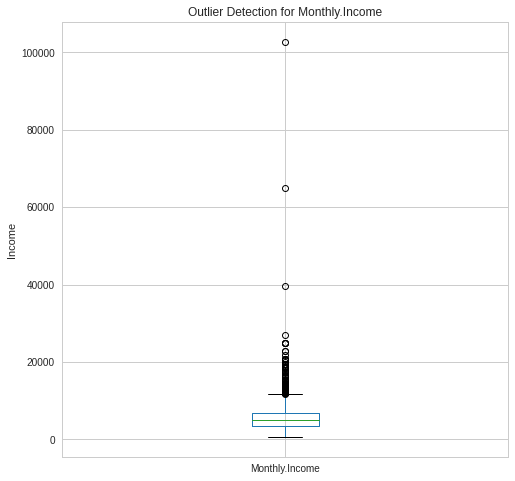

In [ ]:
# Plotting a boxplot for Monthly.Income

ld['Monthly.Income'].plot(kind='box', figsize=(8,8))
plt.ylabel('Income')
plt.title('Outlier Detection for Monthly.Income')

- The **boxplot** of **Monthly.Income** shows the presence of **outliers** in the data.


- The values above **35000** will be dropped.

In [ ]:
# Dropping values having Monthly.Income more than 35000.

ld.drop(ld[ld['Monthly.Income'] > 35000].index, inplace=True)

Text(0.5, 1.0, 'Outlier Detection for Revolving.CREDIT.Balance')

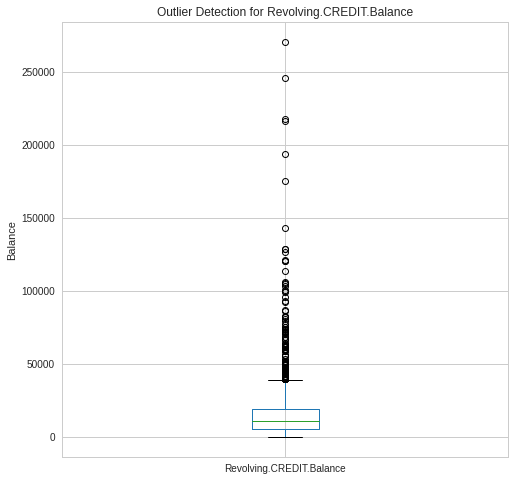

In [ ]:
# Plotting a boxplot for Revolving.CREDIT.Balance

ld['Revolving.CREDIT.Balance'].plot(kind='box', figsize=(8,8))
plt.ylabel('Balance')
plt.title('Outlier Detection for Revolving.CREDIT.Balance')

- The **boxplot** of **Revolving.CREDIT.Balance** shows the presence of **outliers** in the data.


- The values above **150000** will be dropped.

In [ ]:
# Dropping values having Revolving.CREDIT.Balance more than 150000.

ld.drop(ld[ld['Revolving.CREDIT.Balance'] > 150000].index, inplace=True)

Text(0.5, 1.0, 'Outlier Detection for Open.CREDIT.Lines')

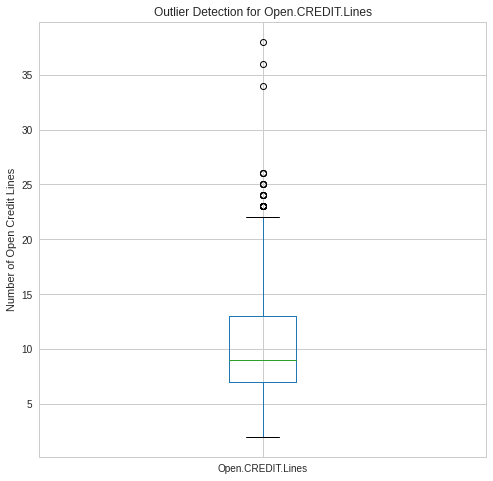

In [ ]:
# Plotting a boxplot for Open.CREDIT.Lines

ld['Open.CREDIT.Lines'].plot(kind='box', figsize=(8,8))
plt.ylabel('Number of Open Credit Lines')
plt.title('Outlier Detection for Open.CREDIT.Lines')

- The **boxplot** of **Open.CREDIT.Lines** shows the presence of **outliers** in the data.


- The values above **30** will be dropped.

In [ ]:
# Dropping values having Open.CREDIT.Lines more than 30.

ld.drop(ld[ld['Open.CREDIT.Lines'] > 30].index, inplace=True)

Monthly.Income                 AxesSubplot(0.125,0.125;0.227941x0.755)
Revolving.CREDIT.Balance    AxesSubplot(0.398529,0.125;0.227941x0.755)
Open.CREDIT.Lines           AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

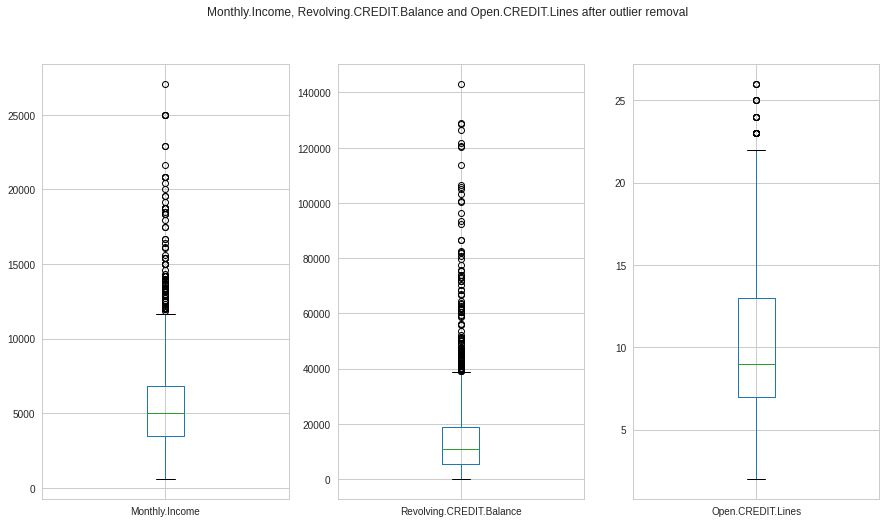

In [ ]:
# Plotting a boxplot showing the above columns after outlier removal.

ld[['Monthly.Income', 'Revolving.CREDIT.Balance', 'Open.CREDIT.Lines']].plot(kind='box', figsize=(15,8), subplots=True, 
                                                                             sharex=True, 
                                                                             title='Monthly.Income, Revolving.CREDIT.Balance and Open.CREDIT.Lines after outlier removal')

- Here we can see the difference in the **boxplots after removing** the **outliers**.

  - **No extreme values** can be seen in the **boxplots** in all the 3 columns.

---

<a id=section40202></a>
#### 4.2.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the output file as __ld_after_preprocessing.html__.

In [ ]:
# To output pandas profiling report to an external html file.

profile = ld.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="ld_after_preprocessing.html")

# To output the pandas profiling report on the notebook.

#ld.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling after Data Processing** <br><br>
__Dataset info__:
- Number of variables: 16
- Number of observations: 2487
- Missing Cells: 0 (0.0%)


__Variables types__: 
- Numeric = 10
- Categorical = 0
- Boolean = 7


<br>

- **fico** column has a **skewness** of **0.81796** and **kurtosis** of **0.13439**.
  
  - The distribution is **positive (right) skewed**.
  
  - The value of **kurtosis** is small which implies that the tail of the distribution is short and no outliers are present in the data.
  
  - **95%** samples lie at a **fico** value **less than 777** and the **maximum** value is **832**.
  
  - **Interquartile range (IQR)** is **45** and **mean** is **707.85**, so extreme outliers will be after ```mean + (3 * IQR)``` ie. **842.85**
  
  
- There is a **negative correlation** between the **Interest.Rate** and **fico** values.

  - This can be seen from the **Pearson's r correlation** plot.

---

Text(0.5, 1.0, 'Distribution of Interest.Rate')

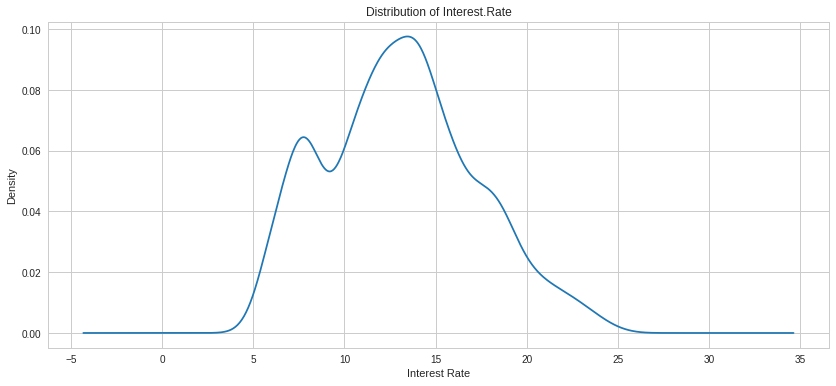

In [ ]:
# Plotting Interest.Rate

ld['Interest.Rate'].plot(kind='kde', figsize=(14,6))
plt.xlabel('Interest Rate')
plt.title('Distribution of Interest.Rate')

- This plot shows the distribution of our **dependent** variable **Interest.Rate**


- **Interest.Rate** is **normally** distributed.

- From this **regplot** between **Interest.Rate** and **Amount.Requested**, it can be seen that for a **lower** value of **Amount.Requested** the **Interest.Rate** is lower.


- **Lenders** tend to provide **lower interest rates** for **smaller loan amounts** because of **lower level of risk** involved with the repayment of the loan. 

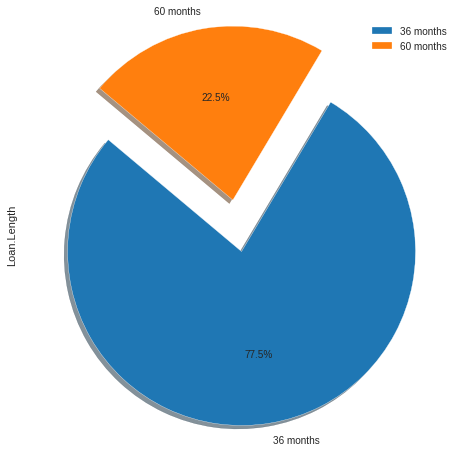

In [ ]:
# Plotting Loan.Length's pie chart

ld['Loan.Length'].value_counts().plot(kind='pie', labels=['36 months','60 months'], explode = (0.1, 0.2), 
                                      autopct='%3.1f%%', shadow=True, startangle=140, legend=True, figsize=(8,8))

- In this pie chart we can see that **36 months** has a **78.1%** share and **60 months** has a **21.9%** share.


- This signifies that people prefer __short-term loans__ more.

Text(0.5, 1.0, 'Interest.Rate vs Monthly.Income')

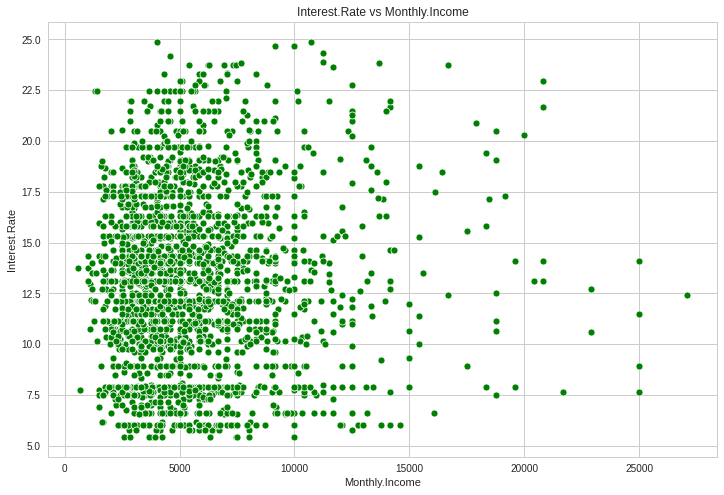

In [ ]:
# Ploting Interest.Rate vs Monthly.Income 

plt.figure(figsize=(12,8))
sns.scatterplot(data=ld, x='Monthly.Income', y='Interest.Rate', color='green')
plt.title('Interest.Rate vs Monthly.Income')

- In this **scatterplot** between **Interest.Rate** and **Monthly.Income**, we can see that applicants with a **lower monthly income** are the ones who apply for loans the most.


- Also **lenders** tend to provide **lower interest rate** to people with **higher monthly income** because of the **lower level of risk** involved with repayment.

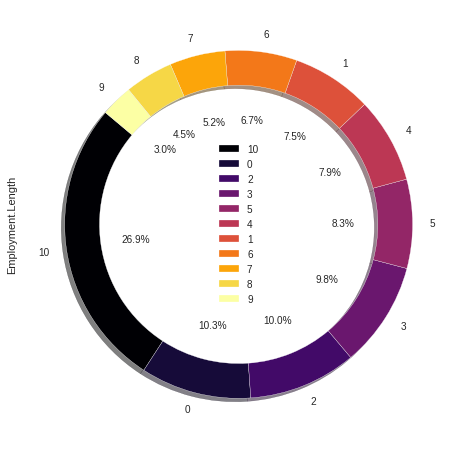

In [ ]:
# Plotting Employment.Length

ld['Employment.Length'].value_counts().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.2),
                                            shadow=True,startangle=140, legend=True, figsize=(10,8), cmap='inferno')

- From this **Doughnut** plot we can see the distribution of **Employment.Length** for its various unique values.


- The value **10** and __0__ have the largest share of **26.0%** and **13.1%** respectively.

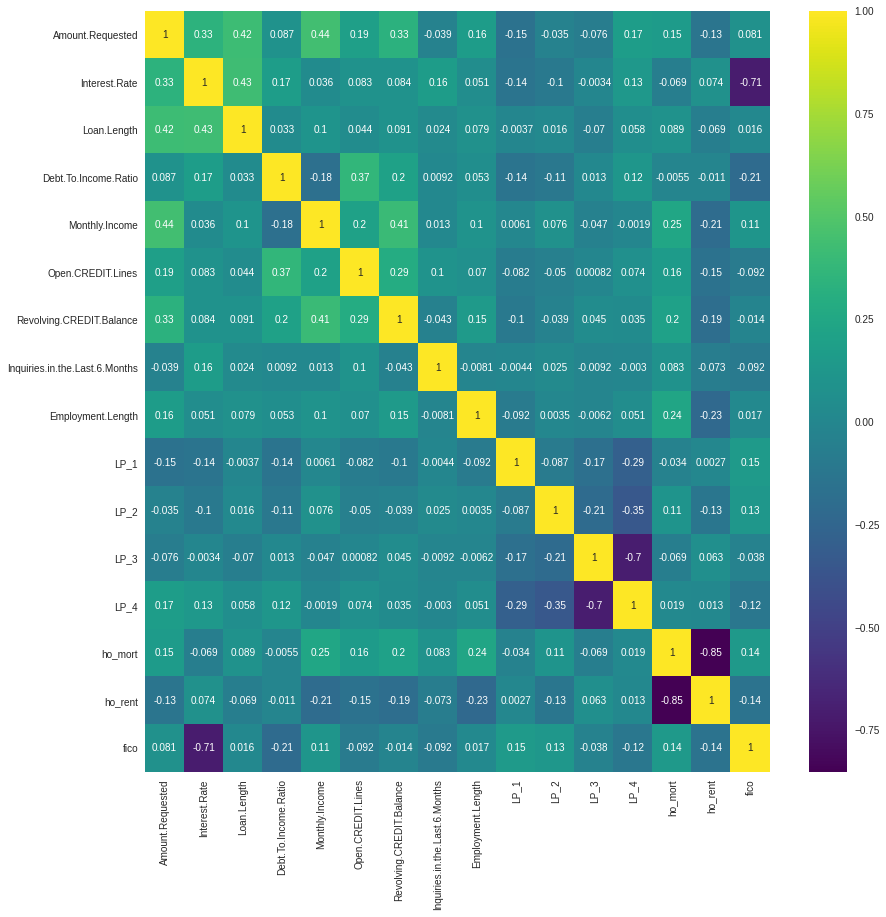

In [ ]:
# Plotting the correlation matrix

corr_mat = ld.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

**Observations from Correlation Matrix** <br>
- The **diagonal** of above matrix shows the **auto-correlation** of variable. It is always equal to 1. 


- **Correlations** can vary from **-1 to +1**. Closer to **+1 means strong positive correlation** and close **-1 means strong negative correlation**. Closer to **0 means not very strongly correlated**. Variables with strong correlations are mostly probable candidates for model builing.


- You can observe from the plot that there is **negative correlation** between **Interest.Rate** and **fico** with a value **-0.71** which implies that as the value of **fico increases** the value of **Interest.Rate decreases**.


- There is a **negative correlation** between **ho_mort** and **ho_rent** columns with a value **-0.85** because both of these column are the **dummy variables** of the column **Home.Ownership** from the original dataset. 
  
  - Since both these columns consists of **91.7%** of the total values in the **Home.Ownership** column and are the **opposite** of each other, that's why they show such a **strong negative correlation**.
  
  - We **can't drop** one of these columns because **jointly** they give information about the **third major category (OWN)** of the **Home.Ownership** column.
  

- There's also a **negative correlation** between **LP_3** and **LP_4** columns with a value **-0.7** because both of these column are the **dummy variables** of the column **Loan.Purpose** from the original dataset. 
  
  - Since both these columns consists of **78.4%** of the total values in the **Loan.Purpose** column and are the **opposite** of each other, that's why they show such a **strong negative correlation**.
  
  - We **can't drop** one of these columns because **jointly** they give information about the **remaining categories** of the **Loan.Purpose** column .

<a id=section6></a>
## 6. Data train/test split
<center>
<img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/train%20test%20split.png" width="300" height="300" />
<center>

We now **split** our **data** into two random parts: 

- One to **build model** on. 
- Another to **test** its **performance**. 

Option **"random_state"** is used to make our random operation reproducible.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into training and test sets.

ld_train, ld_test = train_test_split(ld, test_size = 0.2, random_state = 2)

- Now, we'll separate predictors and response for both the datasets. 



- We'll also **drop ID** from predictor's list because it doesnt make sense to include an ID variable in the model. 


- Variable **"Amount.Funded.By.Investors"** will also be **dropped** because it wont be available until the loan has been processed.


- We can use only those variables which are present at the point of the business process where we want to apply our model.

In [ ]:
# Dropping Interest.Rate from x_train and x_test matrices, and creating y_train and y_test vectors for Interest.Rate values.

x_train = ld_train.drop(['Interest.Rate'], 1)
y_train = ld_train['Interest.Rate']
x_test = ld_test.drop(['Interest.Rate'], 1)
y_test = ld_test['Interest.Rate']

In [ ]:
ld.columns

Index(['Amount.Requested', 'Interest.Rate', 'Loan.Length',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'LP_1', 'LP_2', 'LP_3', 'LP_4', 'ho_mort',
       'ho_rent', 'fico'],
      dtype='object')

In [ ]:
# Creating a list of the names of x_train columns for future use. 

features = x_train.columns
features

Index(['Amount.Requested', 'Loan.Length', 'Debt.To.Income.Ratio',
       'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'LP_1', 'LP_2',
       'LP_3', 'LP_4', 'ho_mort', 'ho_rent', 'fico'],
      dtype='object')

In [ ]:
# Checking the shapes of training and test sets.

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (1906, 15)
Shape of y_train:  (1906,)
Shape of x_test:  (477, 15)
Shape of y_test:  (477,)


<a id=section701></a>
### 6. Modelling in Scikit-Learn

To apply any machine learning algorithm on your dataset, basically there are **4 steps**:

1. **Load the algorithm**
2. **Instantiate and Fit the model to the training dataset**
3. **Prediction on the test set**
4. **Calculating Root mean square error**

The code block given below shows how these steps are carried out:

```from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(x_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

<a id=section7></a>
### 6.1 Linear Regression Model

- The code below creates an object of class **LinearRegression** named **linreg**. We can use this object to access all functions realted to LinearRegression.

In [ ]:
# Creating our linear regression model and fitting the data into it.

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

---

<a id=section702></a>
Using the Model for Prediction

In [ ]:
# Making predictions on the train set.

y_pred_train = linreg.predict(x_train)
y_pred_train[:10]

array([16.7868, 13.9016, 15.0468, 13.2561, 15.5683, 14.8874,  9.9094,
       12.9549, 15.6468, 13.8867])

- Next we **predict** response on our test data, calculate **errors** on those prediction and then **RMSE** for those **residuals**. 


- That is the measure of performance on the test data. We can use this measure to compare other models that we'll build.

In [ ]:
# Making predictions on the test set.

y_pred_test = linreg.predict(x_test)
y_pred_test[:10]

array([ 6.7959, 11.5747, 13.6689, 16.2871, 17.8316,  8.7428, 15.698 ,
        7.5109, 21.9314, 11.1066])

In [ ]:
# To get the intercept of the model.

linreg.intercept_

69.20639255266147

In [ ]:
# To get the coefficients of the model.

coefs = linreg.coef_
features = x_train.columns

list(zip(features,coefs))

[('Amount.Requested', 0.00015699005549043763),
 ('Loan.Length', 0.13667067593740925),
 ('Debt.To.Income.Ratio', -0.00014175031401156117),
 ('Monthly.Income', -2.614926211664398e-05),
 ('Open.CREDIT.Lines', -0.05413825582180609),
 ('Revolving.CREDIT.Balance', -5.183103627653951e-06),
 ('Inquiries.in.the.Last.6.Months', 0.3616627355612971),
 ('Employment.Length', 0.01207897459873547),
 ('LP_1', -0.5667017983276365),
 ('LP_2', -0.8968834220844306),
 ('LP_3', -0.699834546060847),
 ('LP_4', -0.8493479746562882),
 ('ho_mort', -0.28241504189158684),
 ('ho_rent', -0.09536511582337542),
 ('fico', -0.08815836439736491)]

---

Model Evaluation

<a id=section801></a>
Mean Absolute Error (MAE)

- __Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
from sklearn import metrics

In [ ]:
# Calculating the Mean Absolute Error on training and test set.

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)

In [ ]:
print('MAE of the model is {}'.format(MAE_train))

MAE of the model is 1.5357820853549817


---

Mean Squared Error (MSE)

- __Mean Squared Error__ (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [ ]:
# Calculating the Mean Squared Error on training and test set.

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)

In [ ]:
print('MSE of the model is {}'.format(MSE_train))

MSE of the model is 3.946103087805356


---

Root Mean Squared Error (RMSE)

- __Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# Calculating the Root Mean Squared Error on training and test set.

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))

In [ ]:
print('RMSE of the model is {}'.format(RMSE_train))

RMSE of the model is 1.9864800748573734


Comparing these metrics:

- __MAE__(Mean Absolute Error) is the easiest to understand, because it's the __average error.__ 


- __MSE__ (Mean Squared Error) is more popular than MAE, because MSE "punishes" larger errors.


- __RMSE__ ( Root Mean Squared Error) is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

---

In [ ]:
# Calculating R squared value using the metrics.r2_score() method.

R_squared_train = metrics.r2_score(y_train, y_pred_train)
R_squared_test = metrics.r2_score(y_test, y_pred_test)

print('R squared value of the model is {}'.format(R_squared_train))

R squared value of the model is 0.7702153566952381


### 9. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor  
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_train_dt=dt.predict(x_train)
y_pred_train_dt[:10]

array([13.87, 14.17, 15.27, 13.11, 19.99, 16.49,  8.49, 12.12, 14.59,
       16.29])

In [ ]:
# Making predictions on the test set.

y_pred_test_dt = dt.predict(x_test)
y_pred_test_dt[:10]

array([ 6.03,  9.76, 12.12, 17.99, 14.83,  6.03, 19.72,  8.49, 22.95,
        9.99])

In [ ]:
# Calculating the Mean Absolute Error on training and test set.

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train_dt)

In [ ]:
print('MAE of the model is {}'.format(MAE_train))

MAE of the model is 5.35889392788638e-17


In [ ]:
# Calculating the Mean Squared Error on training and test set.

MSE_train = metrics.mean_squared_error(y_train, y_pred_train_dt)

In [ ]:
print('MSE of the model is {}'.format(MSE_train))

MSE of the model is 7.905164370263025e-32


In [ ]:
# Calculating the Root Mean Squared Error on training and test set.

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_dt))

In [ ]:
print('RMSE of the model is {}'.format(RMSE_train))

RMSE of the model is 2.811612414658718e-16


In [ ]:
# Calculating R squared value using the metrics.r2_score() method.

R_squared_train = metrics.r2_score(y_train, y_pred_train_dt)
print('R squared value of the model is {}'.format(R_squared_train))

R squared value of the model is 1.0


### 10. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_train_rf=rf.predict(x_train)
y_pred_train_rf[:10]

array([14.3522, 14.0732, 15.4061, 12.8682, 18.8924, 15.4582,  8.4723,
       12.1726, 15.0996, 15.5075])

In [ ]:
# Making predictions on the test set.

y_pred_test_rf = rf.predict(x_test)
y_pred_test_rf[:10]

array([ 6.5377, 10.5932, 12.6613, 19.0494, 16.9562,  7.1848, 15.9698,
        6.959 , 20.3229, 10.2939])

In [ ]:
residual_rf = y_pred_test_rf - y_test
residual_rf[:10]

1266    0.5077
654     0.6832
1782    0.5413
674     6.9294
1710    0.1362
231    -1.7552
1399    0.3498
788    -0.0310
157    -0.9571
2187   -1.1961
Name: Interest.Rate, dtype: float64

In [ ]:
# Calculating the Mean Absolute Errort.

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train_rf)

In [ ]:
print('MAE of the model is {}'.format(MAE_train))

MAE of the model is 0.49306332633787936


In [ ]:
# Calculating the Mean Squared Error 

MSE_train = metrics.mean_squared_error(y_train, y_pred_train_rf)

In [ ]:
print('MSE of the model is {}'.format(MSE_train))

MSE of the model is 0.45390693980587504


In [ ]:
# Calculating the Root Mean Squared Error 

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_rf))

In [ ]:
print('RMSE of the model is {}'.format(RMSE_train))

RMSE of the model is 0.6737261608442076


In [ ]:
# Calculating R- squared value on training 

R_squared_train = metrics.r2_score(y_train, y_pred_train_rf)
print('R squared value of the model is {}'.format(R_squared_train))

R squared value of the model is 0.9735686468558893


Hyper-Parameter tuning of the model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [10,50,100,200,300,500]
# Number of features to consider at every split
max_features = ['auto', 'log2',2,4,8,12]
# Maximum number of levels in tree
max_depth = [2,4,8,16,25]
max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }

GridSearchCV

In [ ]:
rf_grid = GridSearchCV(estimator = rf, param_grid=random_grid, cv = 3, n_jobs = -1 )
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_grid.score(x_train,y_train)

0.9753626597407492

In [ ]:
rf_grid.best_params_

{'max_depth': 25, 'max_features': 8, 'n_estimators': 500}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=100, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': None, 'max_features': 8, 'n_estimators': 100}

In [ ]:
rf_random.score(x_train,y_train)

0.9756291508837123

In [ ]:
rf.score(x_train,y_train)

0.9735686468558893

<a id=section9></a>
## Conclusion

- **R squared** values for __Training set is 0.77__ 
  - Since the difference in **R squared** values for __training and test__ is **very small**, it indicates that our model is **not overfitting** on the **training set** and is **generalizing** well on the **test set**. 
  - This implies that our model will be able to **make good predictions on new data** and will help the __Loan Aggregator Agency__ to assign suitable **Interest.Rate** to the new applicants based on their applications.


- Further improvements can be made on the model by using some **Feature Selection** methods or by using much **powerful algorithms** like: 
  -  **SVM**
  - **Ensemble Learning Algorithms** 
  - **Artificial Neural Networks(ANNs)**
  - etc..
  
  which you will study as the course goes on.